In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic_data = sns.load_dataset('titanic')

titanic_data.head()    # İlk 5 satırı görüntüleyelim.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
titanic_data.info()  
# Veri setinin bilgilerini görelim (tipler, null değerler vs.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic_data.describe()    # İstatistiksel verileri görelim.

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
missing_data = titanic_data.isnull().sum()

missing_data    # Eksik veri kontrolü.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
missing_percentage = (missing_data / len(titanic_data)) * 100

missing_percentage    # Eksik verilerin yüzdesini de görmek için.

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [17]:
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].mean())   # Eksik 'age' değerlerini ortalama ile dolduralım.

titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- Yaş ve fare ücretine göre hayatta kalma oranlarını gösteren bir dağılım grafiği

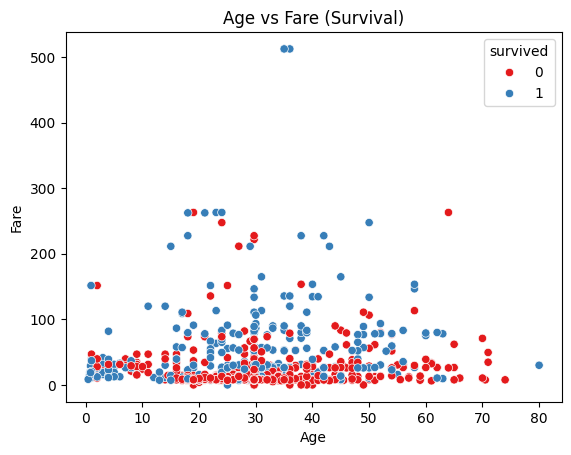

In [20]:
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic_data, palette='Set1')
plt.title('Age vs Fare (Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

- Cinsiyete göre hayatta kalma oranlarını gösteren bir grafik

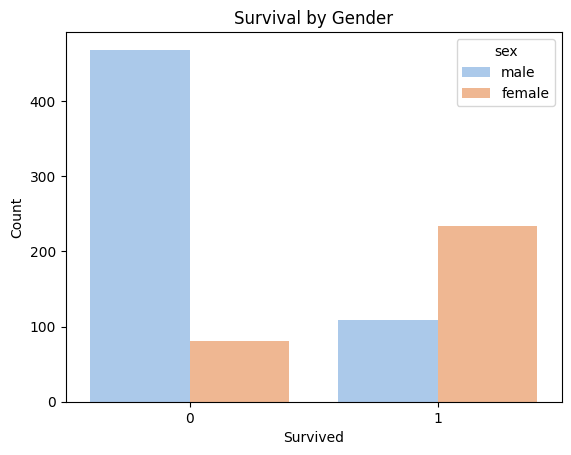

In [21]:
sns.countplot(x='survived', hue='sex', data=titanic_data, palette='pastel')


plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

- Yaş ve fare ücretine göre hayatta kalma oranlarını gösteren bir dağılım grafiği

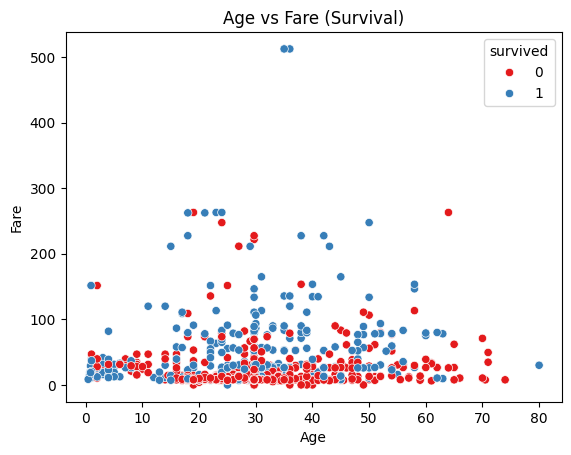

In [22]:
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic_data, palette='Set1')

plt.title('Age vs Fare (Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

- Yolcu sınıfına göre hayatta kalma oranlarını gösteren bir grafik

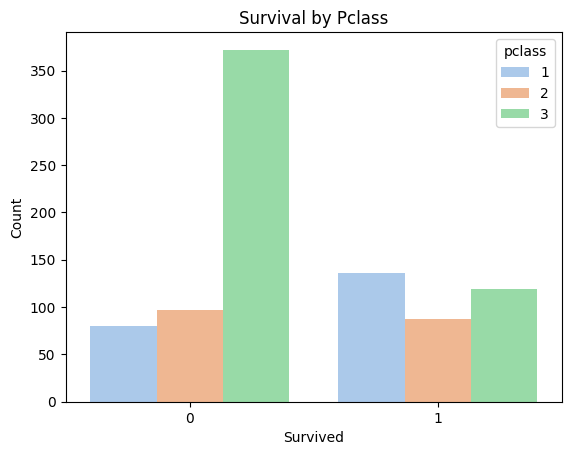

In [23]:
sns.countplot(x='survived', hue='pclass', data=titanic_data, palette='pastel')

plt.title('Survival by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

- Hayatta Kalma Oranı ve Diğer Kategorik Değişkenlerin İncelenmesi

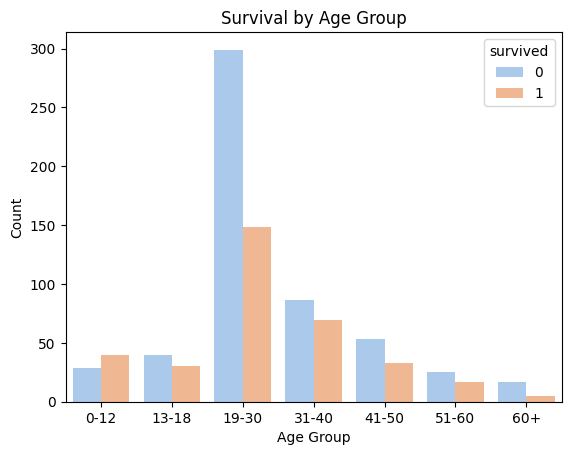

In [25]:
age_bins = [0, 12, 18, 30, 40, 50, 60, 100]
age_labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '60+']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=age_bins, labels=age_labels)

sns.countplot(x='age_group', hue='survived', data=titanic_data, palette='pastel')


plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')


plt.show()

- Sibsp ve Parch değişkenlerinin hayatta kalma ile ilişkisi

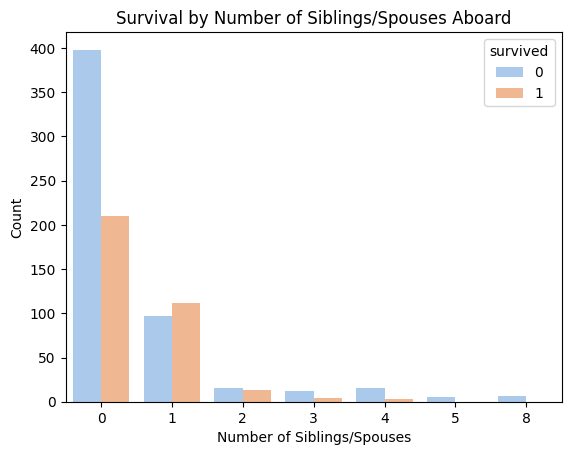

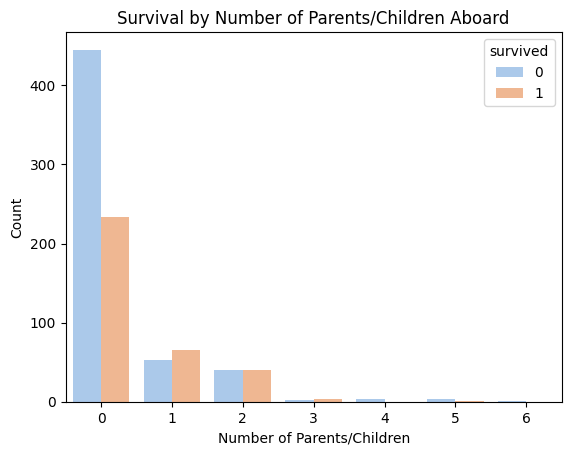

In [26]:
sns.countplot(x='sibsp', hue='survived', data=titanic_data, palette='pastel')

plt.title('Survival by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')

plt.show()

sns.countplot(x='parch', hue='survived', data=titanic_data, palette='pastel')

plt.title('Survival by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')


plt.show()

- Fare ve Yaş ile Hayatta Kalma İlişkisini İnceleme

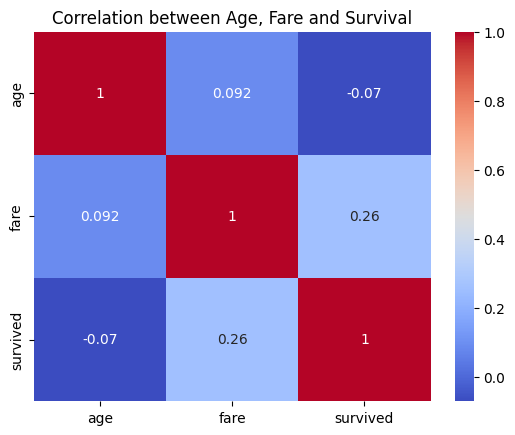

In [27]:
sns.heatmap(titanic_data[['age', 'fare', 'survived']].corr(), annot=True, cmap='coolwarm')


plt.title('Correlation between Age, Fare and Survival')


plt.show()

- Yolcu Sınıfı (Pclass) ve Hayatta Kalma Oranı

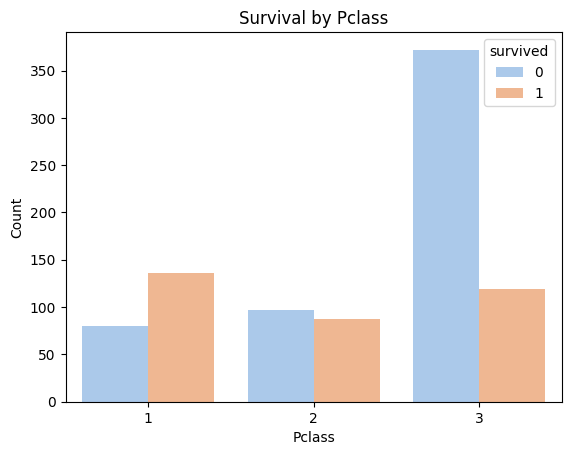

In [28]:
sns.countplot(x='pclass', hue='survived', data=titanic_data, palette='pastel')


plt.title('Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.show()

-  "Embarked" (Yolcu Binme Noktası) Değişkeninin İncelenmesi

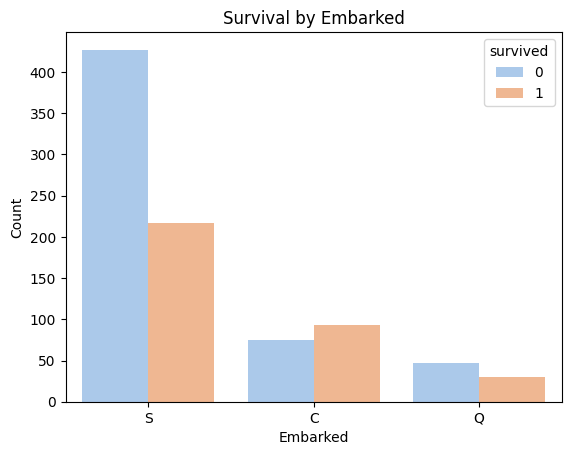

In [29]:
sns.countplot(x='embarked', hue='survived', data=titanic_data, palette='pastel')


plt.title('Survival by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')

plt.show()

- İleri Düzey Korelasyon Analizi

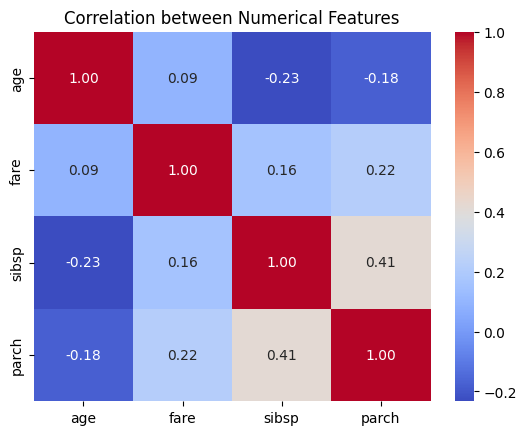

In [30]:
numerical_features = ['age', 'fare', 'sibsp', 'parch']
correlation_matrix = titanic_data[numerical_features].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


plt.title('Correlation between Numerical Features')

plt.show()


### 🎯 Sonuçların Genel Değerlendirilmesi

Bu aşamada yaptığımız analizlerden elde ettiğimiz önemli gözlemler:

1. **👩‍🦰 Cinsiyet**: Kadın yolcuların **hayatta kalma oranları** erkeklerden **daha yüksek**. 
    - *Kadınların hayatta kalma oranı, erkeklerden belirgin şekilde daha fazla.*

2. **🚂 Yolcu Sınıfı (Pclass)**: **Birinci sınıf yolcularının** hayatta kalma oranları daha yüksek.
    - *Birinci sınıf yolcular, Titanic kazasından daha fazla hayatta kalanlar arasında.*

3. **👶 Yaş ve Fare**: **Genç yaşlar** ve **daha düşük bilet ücretleri**, hayatta kalma oranlarıyla daha güçlü bir ilişki gösteriyor.
    - *Genç yolcuların hayatta kalma olasılığı daha yüksek, ayrıca düşük bilet ücretine sahip yolcuların hayatta kalma oranı da artmış.*

4. **👨‍👩‍👧‍👦 Aile Üyeleriyle Seyahat Etme**: Yanında **aile üyesi** olan yolcuların hayatta kalma oranları, yalnız seyahat edenlere göre **daha yüksek**.
    - *Aile üyeleriyle seyahat eden yolcular, yalnız seyahat edenlerden daha yüksek hayatta kalma oranına sahip.*

---
